<a href="https://colab.research.google.com/github/Sharvika-S/DSA-Bootcamp-Java/blob/main/finalimageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder '/content/drive/My Drive/extracted_images' already exists. Skipping extraction.


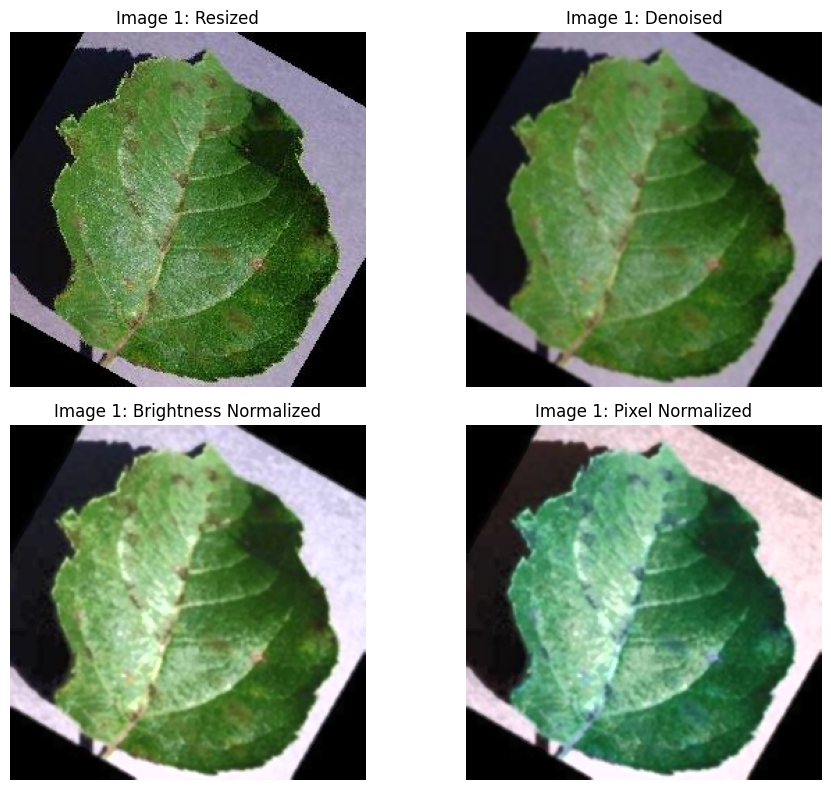

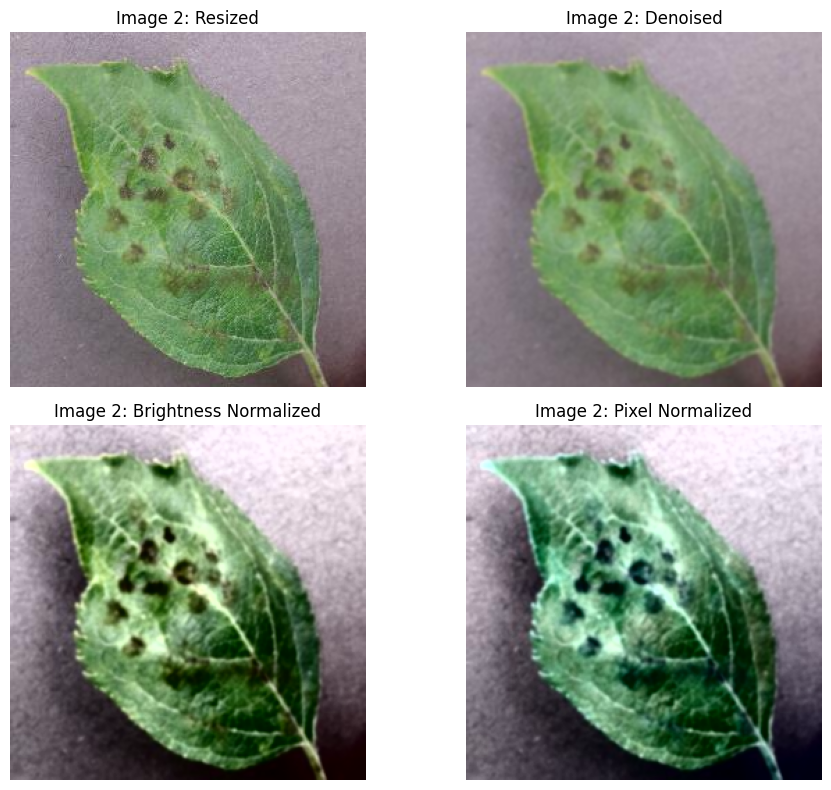

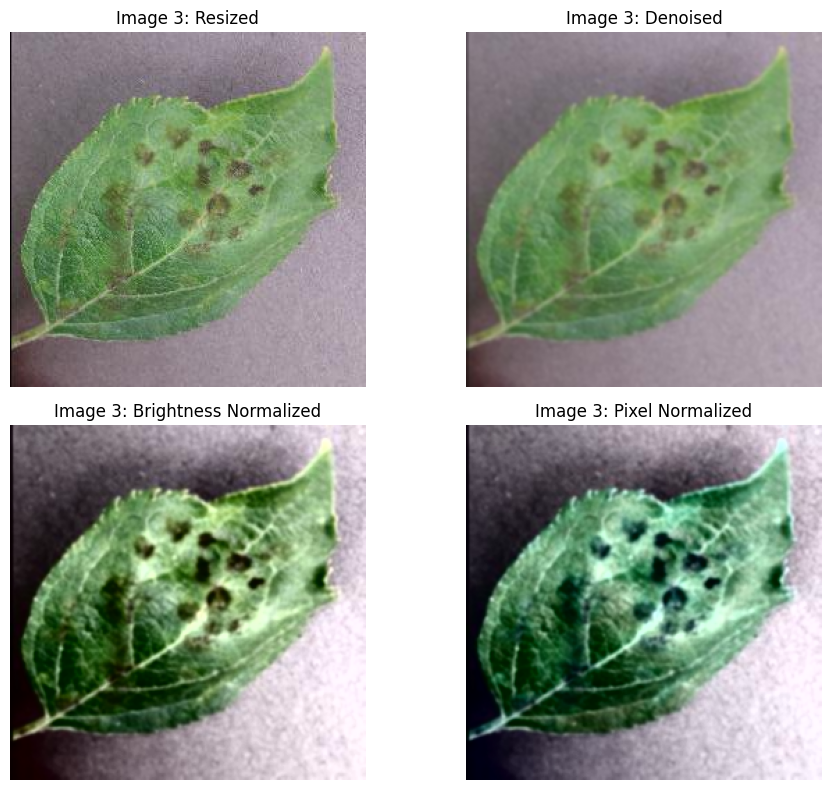

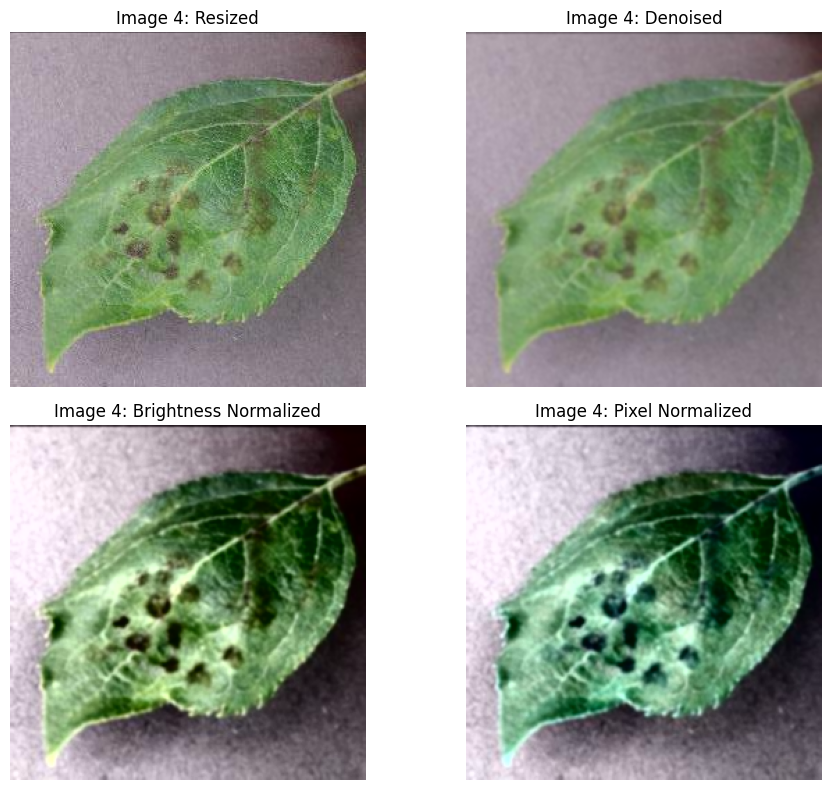

In [ ]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Specify the path to your zipped dataset in Google Drive
zip_file_path = '/content/drive/My Drive/image_dataset.zip'  # Change this to the path of your zip file

# Step 3: Unzip the file
extracted_folder = '/content/drive/My Drive/extracted_images'
if not os.path.exists(extracted_folder):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)
else:
    print(f"Folder '{extracted_folder}' already exists. Skipping extraction.")

# Step 4: Process all images in the extracted folder and its subfolders
processed_image_count = 0  # Counter to track displayed images

for root, dirs, files in os.walk(extracted_folder):  # Recursively walk through folders
    for image_file in files:
        image_path = os.path.join(root, image_file)

        # Check if the file is a valid image
        if not (image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))):
            print(f"Skipping non-image file: {image_file}")
            continue

        # Read the image
        image = cv2.imread(image_path)

        # Check if the image is loaded correctly
        if image is None:
            print(f"Error loading image: {image_file}")
            continue  # Skip this image if loading failed

        # Step 2: Resize the image to 256x256
        uniform_width, uniform_height = 256, 256
        resized_image = cv2.resize(image, (uniform_width, uniform_height), interpolation=cv2.INTER_LINEAR)

        # Step 3: Apply Gaussian Blur to reduce noise
        denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)

        # Step 4: Brightness Normalization
        # Convert to YUV color space
        yuv_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2YUV)

        # Normalize the Y (luminance) channel
        yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])

        # Convert back to BGR color space
        brightness_normalized_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

        # Step 5: Pixel Value Normalization
        # Normalize pixel values to the range [0, 1]
        normalized_image = brightness_normalized_image / 255.0

        # Display the results for the first four images
        if processed_image_count < 4:
            processed_image_count += 1
            plt.figure(figsize=(10, 8))

            # Display Resized Image
            plt.subplot(2, 2, 1)
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Image {processed_image_count}: Resized")
            plt.axis('off')

            # Display Denoised Image
            plt.subplot(2, 2, 2)
            plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Image {processed_image_count}: Denoised")
            plt.axis('off')

            # Display Brightness Normalized Image
            plt.subplot(2, 2, 3)
            plt.imshow(cv2.cvtColor(brightness_normalized_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Image {processed_image_count}: Brightness Normalized")
            plt.axis('off')

            # Display Pixel Normalized Image
            plt.subplot(2, 2, 4)
            plt.imshow(normalized_image)
            plt.title(f"Image {processed_image_count}: Pixel Normalized")
            plt.axis('off')

            # Show the plots
            plt.tight_layout()
            plt.show()
